### Connect to google colab and set working directory

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

%cd "/content/drive/MyDrive/Colab Notebooks/pneumonia-analysis"

Mounted at /content/drive/
/content/drive/MyDrive/Colab Notebooks/pneumonia-analysis


### Dataset path

In [ ]:
data_dir = '/content/drive/MyDrive/Colab Notebooks/pneumonia-analysis/dataset/chest_xray'

### Train model

In [ ]:
!python -m src.train --data_dir "$data_dir" --out_dir "/content/drive/MyDrive/pneumonia_runs/mobilenet_v2" --epochs 10 --arch mobilenet_v2 --loss focal --focal-gamma 2.0 --alpha-mode inv_freq --balance sampler --patience 3

Class counts: [1114, 2951]
Downloading: "https://download.pytorch.org/models/mobilenet_v2-7ebf99e0.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-7ebf99e0.pth
100% 13.6M/13.6M [00:00<00:00, 241MB/s]
Imbalance summary: {'strategy': 'sampler', 'loss': 'focal', 'class_counts': [1114, 2951], 'class_weights': None, 'focal_alpha': [1.4519065618515015, 0.5480934381484985]}
Epoch 1: train loss 0.0916 acc 0.7586 | val loss 0.0348 acc 0.9254 roc_auc 0.9853 pr_auc 0.9946
Epoch 2: train loss 0.0654 acc 0.8469 | val loss 0.0262 acc 0.9412 roc_auc 0.9908 pr_auc 0.9967
Epoch 3: train loss 0.0504 acc 0.8757 | val loss 0.0282 acc 0.9390 roc_auc 0.9926 pr_auc 0.9973
Epoch 4: train loss 0.0483 acc 0.8969 | val loss 0.0238 acc 0.9458 roc_auc 0.9929 pr_auc 0.9975
Epoch 5: train loss 0.0446 acc 0.9023 | val loss 0.0276 acc 0.9401 roc_auc 0.9925 pr_auc 0.9973
Epoch 6: train loss 0.0392 acc 0.9205 | val loss 0.0223 acc 0.9559 roc_auc 0.9936 pr_auc 0.9977
Epoch 7: train loss 0.0372 acc 0.9269 | val lo

### Evaluate performance

In [ ]:
!python -m src.eval --data_dir "$data_dir" --checkpoint "/content/drive/MyDrive/pneumonia_runs/mobilenet_v2/best_mobilenet_v2.pt"

Classification report:
              precision    recall  f1-score   support

      NORMAL       0.94      0.95      0.95       237
   PNEUMONIA       0.98      0.98      0.98       669

    accuracy                           0.97       906
   macro avg       0.96      0.96      0.96       906
weighted avg       0.97      0.97      0.97       906

Imbalance-aware Metrics:
  ROC-AUC: 0.9946
  PR-AUC: 0.9980
  Specificity>=0.90: thr=0.313 sens=0.991 spec=0.903 prec=0.966
  Best F1: thr=0.365 sens=0.990 spec=0.928 prec=0.975 f1=0.982
Confusion matrix:
[[225  12]
 [ 14 655]]


### Vizualize pneumonia_1 with Grad-CAM Bacteria

In [ ]:
from IPython.display import Image

In [ ]:

pneumonia_1 = "/content/drive/MyDrive/Colab Notebooks/pneumonia-analysis/dataset/chest_xray/test/PNEUMONIA/person14_bacteria_51.jpeg"
!python -m src.gradcam --checkpoint "/content/drive/MyDrive/pneumonia_runs/mobilenet_v2/best_mobilenet_v2.pt" --image_path "$pneumonia_1" --out_path "/content/drive/MyDrive/pneumonia_runs/mobilenet_v2/gradcam_pneumonia_1.png" --arch "mobilenet_v2"

Saved Grad-CAM to /content/drive/MyDrive/pneumonia_runs/mobilenet_v2/gradcam_pneumonia_1.png. Pred class id: 1


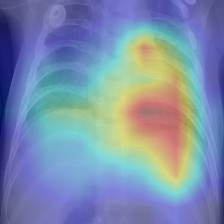

In [ ]:
Image('/content/drive/MyDrive/pneumonia_runs/mobilenet_v2/gradcam_pneumonia_1.png')

### Vizualize pneumonia_2 with Grad-CAM Virus

In [ ]:

pneumonia_2 = "/content/drive/MyDrive/Colab Notebooks/pneumonia-analysis/dataset/chest_xray/test/PNEUMONIA/person15_virus_46.jpeg"
!python -m src.gradcam --checkpoint "/content/drive/MyDrive/pneumonia_runs/mobilenet_v2/best_mobilenet_v2.pt" --image_path "$pneumonia_2" --out_path "/content/drive/MyDrive/pneumonia_runs/mobilenet_v2/gradcam_pneumonia_2.png" --arch "mobilenet_v2"

Saved Grad-CAM to /content/drive/MyDrive/pneumonia_runs/mobilenet_v2/gradcam_pneumonia_2.png. Pred class id: 1


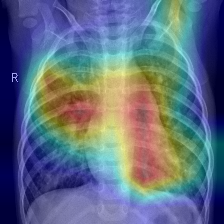

In [ ]:
Image('/content/drive/MyDrive/pneumonia_runs/mobilenet_v2/gradcam_pneumonia_2.png')

### Vizualize Noraml with Grad-CAM

In [ ]:
noraml_1 = "/content/drive/MyDrive/Colab Notebooks/pneumonia-analysis/dataset/chest_xray/test/NORMAL/IM-0433-0001.jpeg"
!python -m src.gradcam --checkpoint "/content/drive/MyDrive/pneumonia_runs/mobilenet_v2/best_mobilenet_v2.pt" --image_path "$noraml_1" --out_path "/content/drive/MyDrive/pneumonia_runs/mobilenet_v2/gradcam_noraml_1.png" --arch "mobilenet_v2"

Saved Grad-CAM to /content/drive/MyDrive/pneumonia_runs/mobilenet_v2/gradcam_noraml_1.png. Pred class id: 0


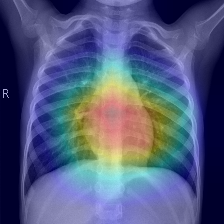

In [ ]:
from IPython.display import Image
Image('/content/drive/MyDrive/pneumonia_runs/mobilenet_v2/gradcam_noraml_1.png')

### Trainable parameter size

In [ ]:
from src.model import create_model
from src.utils import IMAGENET_MEAN, IMAGENET_STD, load_checkpoint

ckpt = load_checkpoint("/content/drive/MyDrive/pneumonia_runs/mobilenet_v2/best_mobilenet_v2.pt")
model = create_model(num_classes=len(ckpt.get("class_to_idx", {0:'Normal',1:'Pneumonia'})), arch="mobilenet_v2", pretrained=False)
total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"Total trainable parameters: {total_params:,}")

Total trainable parameters: 2,946,690
